In [ ]:
!pip install diffusers==0.10.2 transformers scipy ftfy accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.1/503.1 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 98.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.9 MB/s eta 0:00:00


In [ ]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")


Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [ ]:
pipe.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.10.2",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
prompt = "A person floating in our the solar system"

image = pipe(prompt).images[0]

# you can save the image with
image.save(f"person-floating-solar-system.png")

  0%|          | 0/50 [00:00<?, ?it/s]

## **Writing your own inference pipeline**

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")


Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [ ]:
#If you want deterministic output you can seed a random seed and pass a generator to the pipeline.
#Every time you use a generator with the same seed you'll get the same image output.

prompt = "A person floating in our the solar system"
generator = torch.Generator("cuda").manual_seed(1024)
image = pipe(prompt, guidance_scale=7.5, generator=generator).images[0]
image.save(f"person-floating-solar-system.png")

NameError: ignored

In [ ]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel, PNDMScheduler

# 1. Load the autoencoder model which will be used to decode the latents into image space. 
vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")

# 2. Load the tokenizer and text encoder to tokenize and encode the text. 
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")

# 3. The UNet model for generating the latents.
unet = UNet2DConditionModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="unet")

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.3.mlp.fc1.bias', 'vision_model.encoder.layers.6.self_attn.q_proj.bias', 'vision_model.encoder.layers.13.self_attn.v_proj.bias', 'vision_model.encoder.layers.10.mlp.fc1.weight', 'vision_model.encoder.layers.21.mlp.fc1.bias', 'vision_model.encoder.layers.22.mlp.fc1.bias', 'vision_model.encoder.layers.22.mlp.fc1.weight', 'vision_model.encoder.layers.21.self_attn.out_proj.weight', 'vision_model.encoder.layers.17.self_attn.out_proj.bias', 'vision_model.encoder.layers.14.self_attn.k_proj.bias', 'vision_model.encoder.layers.11.mlp.fc1.bias', 'vision_model.encoder.layers.0.self_attn.out_proj.weight', 'vision_model.encoder.layers.19.self_attn.out_proj.bias', 'vision_model.encoder.layers.19.layer_norm1.weight', 'vision_model.encoder.layers.9.self_attn.v_proj.weight', 'vision_model.encoder.layers.13.self_attn.k_proj.weight', 'vision_model.encoder.layer

In [ ]:
from diffusers import LMSDiscreteScheduler

scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)

In [ ]:
torch_device = "cuda"
vae.to(torch_device)
text_encoder.to(torch_device)
unet.to(torch_device) 

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (attn1): CrossAttention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_features=320, bias=False)
                (to_out): ModuleList(
          

In [ ]:
import torch
prompt = ["a traveller resting under the tree on the bank of a river"]

height = 512                        # default height of Stable Diffusion
width = 512                         # default width of Stable Diffusion

num_inference_steps = 100           # Number of denoising steps

guidance_scale = 7.5                # Scale for classifier-free guidance

generator = torch.manual_seed(0)    # Seed generator to create the inital latent noise

batch_size = len(prompt)

In [ ]:
#First, we get the text_embeddings for the passed prompt. 
#These embeddings will be used to condition the UNet model and guide the image generation towards something that should resemble the input prompt.

text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
print(text_input.input_ids.shape)
text_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0]
print(text_embeddings.shape)

torch.Size([1, 77])
torch.Size([1, 77, 768])


In [ ]:
max_length = text_input.input_ids.shape[-1]   # i.e. 77
uncond_input = tokenizer(
    [""] * batch_size, padding="max_length", max_length=max_length, return_tensors="pt"
)
uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0]

In [ ]:
print(uncond_embeddings.shape)

torch.Size([1, 77, 768])


In [ ]:
#For classifier-free guidance, we need to do two forward passes: one with the conditioned input (text_embeddings), and another with the unconditional embeddings (uncond_embeddings). 
#In practice, we can concatenate both into a single batch to avoid doing two forward passes.


text_embeddings = torch.cat([uncond_embeddings, text_embeddings])
print(text_embeddings.shape)

torch.Size([2, 77, 768])


In [ ]:
#we generate the initial random noise.

latents = torch.randn(
    (batch_size, unet.in_channels, height // 8, width // 8),
    generator=generator,
)
latents = latents.to(torch_device)
print(latents.shape)

#If we examine the latents at this stage we'll see their shape is torch.Size([1, 4, 64, 64]), 
#much smaller than the image we want to generate. 
#The model will transform this latent representation (pure noise) into a 512 × 512 image later on.


torch.Size([1, 4, 64, 64])


In [ ]:
#we initialize the scheduler with our chosen num_inference_steps. 
#This will compute the sigmas and exact time step values to be used during the denoising process.

scheduler.set_timesteps(num_inference_steps)

In [ ]:
#The K-LMS scheduler needs to multiply the latents by its sigma values. Let's do this here:

latents = latents * scheduler.init_noise_sigma

In [ ]:
#Denoising Loop

from tqdm.auto import tqdm

scheduler.set_timesteps(num_inference_steps)

for t in tqdm(scheduler.timesteps):
    # expand the latents if we are doing classifier-free guidance to avoid doing two forward passes.
    latent_model_input = torch.cat([latents] * 2)

    latent_model_input = scheduler.scale_model_input(latent_model_input, timestep=t)

    # predict the noise residual
    with torch.no_grad():
        noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample

    # perform guidance
    noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
    noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

    # compute the previous noisy sample x_t -> x_t-1
    latents = scheduler.step(noise_pred, t, latents).prev_sample


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
#We now use the vae to decode the generated latents back into the image.

# scale and decode the image latents with vae
latents = 1 / 0.18215 * latents
with torch.no_grad():
    image = vae.decode(latents).sample

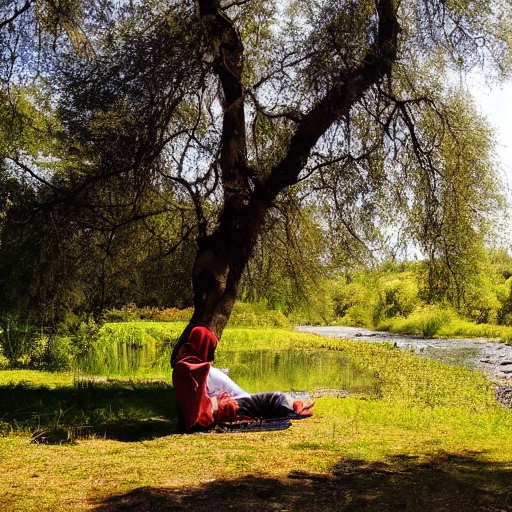

In [ ]:
#let's convert the image to PIL so we can display or save it.

image = (image / 2 + 0.5).clamp(0, 1)
image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
images = (image * 255).round().astype("uint8")
pil_images = [Image.fromarray(image) for image in images]
pil_images[0]

# **Stable Diffusion With ControlNet**

In [ ]:
%cd /content
!git clone --recurse-submodules https://github.com/camenduru/ControlNet-with-other-models
!sudo apt-get install aria2
!pip install gradio -r /content/ControlNet-with-other-models/requirements.txt

!sed -i -e 's/launch()/launch(share=True)/g' /content/ControlNet-with-other-models/app.py
!sed -i -e 's|\.\/annotator\/ckpts\/network-bsds500\.pth|\/content\/ControlNet-with-other-models\/ControlNet\/annotator\/ckpts\/network-bsds500.pth|g' /content/ControlNet-with-other-models/ControlNet/annotator/hed/__init__.py
!sed -i -e 's|annotator\/ckpts\/dpt_large-midas-2f21e586\.pt|\/content\/ControlNet-with-other-models\/ControlNet\/annotator\/ckpts\/dpt_large-midas-2f21e586.pt|g' /content/ControlNet-with-other-models/ControlNet/annotator/midas/api.py
!sed -i -e 's|annotator\/ckpts\/dpt_hybrid-midas-501f0c75\.pt|\/content\/ControlNet-with-other-models\/ControlNet\/annotator\/ckpts\/dpt_hybrid-midas-501f0c75.pt|g' /content/ControlNet-with-other-models/ControlNet/annotator/midas/api.py
!sed -i -e 's|\.\/annotator\/ckpts/mlsd_large_512_fp32.pth|\/content\/ControlNet-with-other-models\/ControlNet\/annotator\/ckpts\/mlsd_large_512_fp32.pth|g' /content/ControlNet-with-other-models/ControlNet/annotator/mlsd/__init__.py
!sed -i -e 's|\.\/annotator\/ckpts\/body_pose_model\.pth|\/content\/ControlNet-with-other-models\/ControlNet\/annotator\/ckpts/body_pose_model.pth|g' /content/ControlNet-with-other-models/ControlNet/annotator/openpose/__init__.py
!sed -i -e 's|\.\/annotator\/ckpts\/hand_pose_model\.pth|\/content\/ControlNet-with-other-models\/ControlNet\/annotator\/ckpts/hand_pose_model.pth|g' /content/ControlNet-with-other-models/ControlNet/annotator/openpose/__init__.py
!sed -i -e 's|annotator\/ckpts\/upernet_global_small.pth|\/content\/ControlNet-with-other-models\/ControlNet\/annotator\/ckpts\/upernet_global_small.pth|g' /content/ControlNet-with-other-models/ControlNet/annotator/uniformer/__init__.py
!sed -i -e 's|annotator\/uniformer\/exp\/upernet_global_small\/config\.py|\/content\/ControlNet-with-other-models\/ControlNet\/annotator\/uniformer\/exp\/upernet_global_small\/config.py|g' /content/ControlNet-with-other-models/ControlNet/annotator/uniformer/__init__.py

!sed -i -e 's|DEFAULT_BASE_MODEL_REPO_PLACEHOLDER|ckpt\/sd15|g' /content/ControlNet-with-other-models/model.py 
!sed -i -e 's|DEFAULT_BASE_MODEL_FILENAME_PLACEHOLDER|v1-5-pruned-emaonly.ckpt|g' /content/ControlNet-with-other-models/model.py 
!sed -i -e 's|DEFAULT_BASE_MODEL_URL_PLACEHOLDER|https:\/\/huggingface.co\/ckpt\/sd15\/resolve\/main\/v1-5-pruned-emaonly.ckpt|g' /content/ControlNet-with-other-models/model.py

%cd /content/ControlNet-with-other-models
!python /content/ControlNet-with-other-models/app.py

/content
Cloning into 'ControlNet-with-other-models'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 52 (delta 11), reused 9 (delta 9), pack-reused 37
Unpacking objects: 100% (52/52), 21.28 KiB | 1.42 MiB/s, done.
Submodule 'ControlNet' (https://github.com/lllyasviel/ControlNet) registered for path 'ControlNet'
Cloning into '/content/ControlNet-with-other-models/ControlNet'...
remote: Enumerating objects: 1264, done.        
remote: Total 1264 (delta 0), reused 0 (delta 0), pack-reused 1264        
Receiving objects: 100% (1264/1264), 122.36 MiB | 38.66 MiB/s, done.
Resolving deltas: 100% (549/549), done.
Submodule path 'ControlNet': checked out 'f4748e3630d8141d7765e2bd9b1e348f47847707'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 's

# **audio-diffusion**
Apply diffusion models to synthesize music instead of images using the new Hugging Face diffusers package

In [ ]:
try:
    # are we running on Google Colab?
    import google.colab
    !git clone -q https://github.com/teticio/audio-diffusion.git
    %cd audio-diffusion
    %pip install -q -r requirements.txt
except:
    pass

fatal: destination path 'audio-diffusion' already exists and is not an empty directory.
/content/audio-diffusion


In [ ]:
import os
import sys
sys.path.insert(0, os.path.dirname(os.path.abspath("")))

In [ ]:
import torch
import random
import librosa
import numpy as np
from datasets import load_dataset
from IPython.display import Audio
from audiodiffusion import AudioDiffusion

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
generator = torch.Generator(device=device)

In [ ]:
#model_id=teticio/audio-diffusion-256                     - trained on my Spotify "liked" playlist

#model_id=teticio/audio-diffusion-breaks-256              - trained on samples used in music

#model_id=teticio/audio-diffusion-instrumental-hiphop-256 - trained on instrumental hiphop

#model_id="teticio/audio-diffusion-ddim-256"  
model_id = "teticio/audio-diffusion-256"  #["teticio/audio-diffusion-256", "teticio/audio-diffusion-breaks-256", "audio-diffusion-instrumenal-hiphop-256", "teticio/audio-diffusion-ddim-256"]

In [ ]:
audio_diffusion = AudioDiffusion(model_id=model_id)
mel = audio_diffusion.pipe.mel

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
for _ in range(10):
    seed = generator.seed()
    print(f'Seed = {seed}')
    generator.manual_seed(seed)
    image, (sample_rate,
            audio) = audio_diffusion.generate_spectrogram_and_audio(
                generator=generator)
    display(image)
    display(Audio(audio, rate=sample_rate))
    loop = AudioDiffusion.loop_it(audio, sample_rate)
    if loop is not None:
        display(Audio(loop, rate=sample_rate))
    else:
        print("Unable to determine loop points")

Output hidden; open in https://colab.research.google.com to view.

The parameter eta controls the variance:

0 - DDIM (deterministic)
1 - DDPM (De-noising Diffusion Probabilistic Model)

  0%|          | 0/1000 [00:00<?, ?it/s]

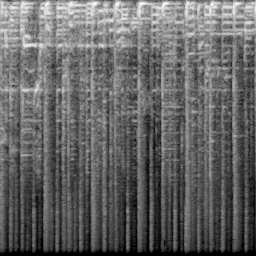

In [ ]:
image, (sample_rate, audio) = audio_diffusion.generate_spectrogram_and_audio(
    steps=1000, generator=generator, eta=1)
display(image)
display(Audio(audio, rate=sample_rate))

DDIMs can be used as encoders...

In [ ]:
# Doesn't have to be an audio from the train dataset, this is just for convenience
ds = load_dataset('teticio/audio-diffusion-256')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/21571 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/teticio___parquet/teticio--audio-diffusion-256-09d174a5724b0931/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
image = ds['train'][264]['image']
display(Audio(mel.image_to_audio(image), rate=sample_rate))

In [ ]:
noise = audio_diffusion.pipe.encode([image])

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/torch/utils/_contextlib.py:115 in decorate_context        │
│                                                                                                  │
│   112 │   @functools.wraps(func)                                                                 │
│   113 │   def decorate_context(*args, **kwargs):                                                 │
│   114 │   │   with ctx_factory():                                                                │
│ ❱ 115 │   │   │   return func(*args, **kwargs)                                                   │
│   116 │                                                                                          │
│   117 │   return decorate_context                                                                │
│   118                                                                                            │
│                                                                                                  │
│ /content/audio-diffusion/audiodiffusion/pipeline_audio_diffusion.py:236 in encode                │
│                                                                                                  │
│   233 │   │   """                                                                                │
│   234 │   │                                                                                      │
│   235 │   │   # Only works with DDIM as this method is deterministic                             │
│ ❱ 236 │   │   assert isinstance(self.scheduler, DDIMScheduler)                                   │
│   237 │   │   self.scheduler.set_timesteps(steps)                                                │
│   238 │   │   sample = np.array(                                                                 │
│   239 │   │   │   [np.frombuffer(image.tobytes(), dtype="uint8").reshape((1, image.height, ima   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AssertionError

In [ ]:
# Reconstruct original audio from noise
_, (sample_rate, audio) = audio_diffusion.generate_spectrogram_and_audio(
    noise=noise, generator=generator)
display(Audio(audio, rate=sample_rate))

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 2>:3                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'noise' is not defined

In [ ]:
#To interpolate between audios
image2 = ds['train'][15978]['image']
display(Audio(mel.image_to_audio(image2), rate=sample_rate))

In [ ]:
noise2 = audio_diffusion.pipe.encode([image2])

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/torch/utils/_contextlib.py:115 in decorate_context        │
│                                                                                                  │
│   112 │   @functools.wraps(func)                                                                 │
│   113 │   def decorate_context(*args, **kwargs):                                                 │
│   114 │   │   with ctx_factory():                                                                │
│ ❱ 115 │   │   │   return func(*args, **kwargs)                                                   │
│   116 │                                                                                          │
│   117 │   return decorate_context                                                                │
│   118                                                                                            │
│                                                                                                  │
│ /content/audio-diffusion/audiodiffusion/pipeline_audio_diffusion.py:236 in encode                │
│                                                                                                  │
│   233 │   │   """                                                                                │
│   234 │   │                                                                                      │
│   235 │   │   # Only works with DDIM as this method is deterministic                             │
│ ❱ 236 │   │   assert isinstance(self.scheduler, DDIMScheduler)                                   │
│   237 │   │   self.scheduler.set_timesteps(steps)                                                │
│   238 │   │   sample = np.array(                                                                 │
│   239 │   │   │   [np.frombuffer(image.tobytes(), dtype="uint8").reshape((1, image.height, ima   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AssertionError

**Latent Audio Diffusion**

Instead of de-noising images directly in the pixel space, we can work in the latent space of a pre-trained VAE (Variational AutoEncoder). This is much faster to train and run inference on, although the quality suffers as there are now three stages involved in encoding / decoding: mel spectrogram, VAE and de-noising.

In [ ]:
model_id = "teticio/latent-audio-diffusion-ddim-256" 

In [ ]:
audio_diffusion = AudioDiffusion(model_id=model_id)
mel = audio_diffusion.pipe.mel

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

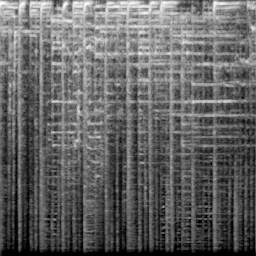

In [ ]:
seed = 3412253600050855  
generator.manual_seed(seed)
image, (sample_rate, audio) = audio_diffusion.generate_spectrogram_and_audio(
    generator=generator)
display(image)
display(Audio(audio, rate=sample_rate))

  0%|          | 0/50 [00:00<?, ?it/s]

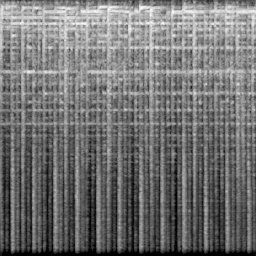

In [ ]:
seed2 = 7016114633369557 
generator.manual_seed(seed2)
image2, (sample_rate, audio2) = audio_diffusion.generate_spectrogram_and_audio(
    generator=generator)
display(image2)
display(Audio(audio2, rate=sample_rate))

**Interpolation in latent space**

As the VAE forces a more compact, lower dimensional representation for the spectrograms, interpolation in latent space can lead to meaningful combinations of audios. In combination with the (deterministic) DDIM from the previous section, the model can be used as an encoder / decoder to a lower dimensional space.

In [ ]:
generator.manual_seed(seed)
latents = torch.randn((1, audio_diffusion.pipe.unet.in_channels,
                       audio_diffusion.pipe.unet.sample_size[0],
                       audio_diffusion.pipe.unet.sample_size[1]),
                      device=device,
                      generator=generator)
latents.shape

torch.Size([1, 1, 32, 32])

In [ ]:
generator.manual_seed(seed2)
latents2 = torch.randn((1, audio_diffusion.pipe.unet.in_channels,
                        audio_diffusion.pipe.unet.sample_size[0],
                        audio_diffusion.pipe.unet.sample_size[1]),
                       device=device,
                       generator=generator)
latents2.shape

torch.Size([1, 1, 32, 32])

In [ ]:
alpha = 0.5  #@param {type:"slider", min:0, max:1, step:0.1}
_, (sample_rate, audio3) = audio_diffusion.generate_spectrogram_and_audio(
    noise=audio_diffusion.pipe.slerp(latents, latents2, alpha),
    generator=generator)
display(Audio(audio, rate=sample_rate))
display(Audio(audio2, rate=sample_rate))
display(Audio(audio3, rate=sample_rate))

  0%|          | 0/50 [00:00<?, ?it/s]

## **MultiDiffusion_Panorama**

In [ ]:
!pip install diffusers
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 37.0 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.27.4-py3-none-any.whl (6.8 MB)


In [ ]:
import torch
from diffusers import StableDiffusionPanoramaPipeline, DDIMScheduler

model_ckpt = "stabilityai/stable-diffusion-2-base"
scheduler = DDIMScheduler.from_pretrained(model_ckpt, subfolder="scheduler")
pipe = StableDiffusionPanoramaPipeline.from_pretrained(
     model_ckpt, scheduler=scheduler, torch_dtype=torch.float16
)

pipe = pipe.to("cuda")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [ ]:
#Create an example panorama
H = 512
W = 2048

prompt = "a photo of the dolomites with a thinking person "
image = pipe(prompt, height=H, width=W).images[0]
image

Output hidden; open in https://colab.research.google.com to view.

# Attend-And-Excite-Diffusion

In [ ]:
!pip install ftfy
!pip install torch==1.12.0+cu116 torchvision==0.13.0+cu116 torchaudio==0.12.0 --extra-index-url https://download.pytorch.org/whl/cu116
!pip install diffusers==0.12.1
!pip install transformers==4.26.0
!pip install pyrallis
#!pip install -r environment/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 GB 600.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 67.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.0.1+cu118
    Uninstalling torchaudio-2.0.1+cu118:
      Successfully uninstalled 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 71.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!git clone https://github.com/AttendAndExcite/Attend-and-Excite
%cd Attend-and-Excite/

/content/Attend-and-Excite


In [ ]:
from typing import List, Dict, Optional
import torch

import sys 
sys.path.append(".")
sys.path.append("..")

from pipeline_attend_and_excite import AttendAndExcitePipeline
from config import RunConfig
from run import run_on_prompt, get_indices_to_alter
from utils import vis_utils
from utils.ptp_utils import AttentionStore

%load_ext autoreload 
%autoreload 2

In [ ]:
NUM_DIFFUSION_STEPS = 50
GUIDANCE_SCALE = 7.5
MAX_NUM_WORDS = 77
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
stable = AttendAndExcitePipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to(device)
tokenizer = stable.tokenizer

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


Pipeline Wrapper

In [ ]:
# configurable parameters (see RunConfig for all parameters)
# scale factor - intensity of shift by gradient
# thresholds - a dictionary for iterative refinement mapping the iteration number to the attention threshold
# max_iter_to_alter- maximal inference timestep to apply Attend-and-Excite
def run_and_display(prompts: List[str],
                    controller: AttentionStore,
                    indices_to_alter: List[int],
                    generator: torch.Generator,
                    run_standard_sd: bool = False,
                    scale_factor: int = 20,
                    thresholds: Dict[int, float] = {0:0.05, 10: 0.5, 20: 0.8},
                    max_iter_to_alter: int = 25,
                    display_output: bool = False,
                    sd_2_1: bool = False):
    config = RunConfig(prompt=prompts[0],
                       run_standard_sd=run_standard_sd,
                       scale_factor=scale_factor,
                       thresholds=thresholds,
                       max_iter_to_alter=max_iter_to_alter,
                       sd_2_1=sd_2_1)
    image = run_on_prompt(model=stable,
                          prompt=prompts,
                          controller=controller,
                          token_indices=indices_to_alter,
                          seed=generator,
                          config=config)
    if display_output:
        display(image)
    return image

Run Inference on a Set of Seeds and Generate an Image Grid

In [ ]:
def generate_images_for_method(prompt: str,
                               seeds: List[int],
                               indices_to_alter: Optional[List[int]] = None,
                               is_attend_and_excite: bool = True,
                               sd_2_1: bool = False):
    token_indices = get_indices_to_alter(stable, prompt) if indices_to_alter is None else indices_to_alter
    images = []
    for seed in seeds:
        g = torch.Generator('cuda').manual_seed(seed)
        prompts = [prompt]
        controller = AttentionStore()
        run_standard_sd = False if is_attend_and_excite else True
        image = run_and_display(prompts=prompts,
                                controller=controller,
                                indices_to_alter=token_indices,
                                generator=g,
                                run_standard_sd=run_standard_sd,
                                sd_2_1=sd_2_1)
        images.append(image.resize((256, 256)))
    grid = vis_utils.get_image_grid(images)
    display(grid)

*Stable Diffusion vs. Attend-and-Excite*

In [ ]:
#Stable Diffusion
generate_images_for_method(
    prompt="a cat and a frog",
    seeds=[6141, 9031, 969, 1910],
    is_attend_and_excite=False
)

{1: 'a', 2: 'cat', 3: 'and', 4: 'a', 5: 'frog'}
Please enter the a comma-separated list indices of the tokens you wish to alter (e.g., 2,5): 2,5
Altering tokens: ['cat', 'frog']


  0%|          | 0/50 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 2>:2                                                                              │
│ in generate_images_for_method:13                                                                 │
│ in run_and_display:21                                                                            │
│                                                                                                  │
│ /content/Attend-and-Excite/run.py:48 in run_on_prompt                                            │
│                                                                                                  │
│   45 │   │   │   │     config: RunConfig) -> Image.Image:                                        │
│   46 │   if controller is not None:                                                              │
│   47 │   │   ptp_utils.register_attention_control(model, controller)                             │
│ ❱ 48 │   outputs = model(prompt=prompt,                                                          │
│   49 │   │   │   │   │   attention_store=controller,                                             │
│   50 │   │   │   │   │   indices_to_alter=token_indices,                                         │
│   51 │   │   │   │   │   attention_res=config.attention_res,                                     │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/torch/autograd/grad_mode.py:27 in decorate_context        │
│                                                                                                  │
│    24 │   │   @functools.wraps(func)                                                             │
│    25 │   │   def decorate_context(*args, **kwargs):                                             │
│    26 │   │   │   with self.clone():                                                             │
│ ❱  27 │   │   │   │   return func(*args, **kwargs)                                               │
│    28 │   │   return cast(F, decorate_context)                                                   │
│    29 │                                                                                          │
│    30 │   def _wrap_generator(self, func):                                                       │
│                                                                                                  │
│ /content/Attend-and-Excite/pipeline_attend_and_excite.py:566 in __call__                         │
│                                                                                                  │
│   563 │   │   │   │   latent_model_input = self.scheduler.scale_model_input(latent_model_input   │
│   564 │   │   │   │                                                                              │
│   565 │   │   │   │   # predict the noise residual                                               │
│ ❱ 566 │   │   │   │   noise_pred = self.unet(                                                    │
│   567 │   │   │   │   │   latent_model_input,                                                    │
│   568 │   │   │   │   │   t,                                                                     │
│   569 │   │   │   │   │   encoder_hidden_states=prompt_embeds,                                   │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/torch/nn/modules/module.py:1130 in _call_impl             │
│                                                                                                  │
│   1127 │   │   # this function, and just call forward.                                           │
│   1128 │   │   if not (self._backward_hooks or self._forward_hooks or self._forward_pre_hooks o  │
│   1129 │   │   │   │   or _global_forward_hooks or _global_

In [ ]:
#Attend-and-Exite Stable Diffusion

generate_images_for_method(
    prompt="a cat and a frog",
    seeds=[6141, 9031, 969, 1910],
    is_attend_and_excite=True
)

{1: 'a', 2: 'cat', 3: 'and', 4: 'a', 5: 'frog'}
Please enter the a comma-separated list indices of the tokens you wish to alter (e.g., 2,5): 2,5
Altering tokens: ['cat', 'frog']


  0%|          | 0/50 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 3>:3                                                                              │
│ in generate_images_for_method:13                                                                 │
│ in run_and_display:21                                                                            │
│                                                                                                  │
│ /content/Attend-and-Excite/run.py:48 in run_on_prompt                                            │
│                                                                                                  │
│   45 │   │   │   │     config: RunConfig) -> Image.Image:                                        │
│   46 │   if controller is not None:                                                              │
│   47 │   │   ptp_utils.register_attention_control(model, controller)                             │
│ ❱ 48 │   outputs = model(prompt=prompt,                                                          │
│   49 │   │   │   │   │   attention_store=controller,                                             │
│   50 │   │   │   │   │   indices_to_alter=token_indices,                                         │
│   51 │   │   │   │   │   attention_res=config.attention_res,                                     │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/torch/autograd/grad_mode.py:27 in decorate_context        │
│                                                                                                  │
│    24 │   │   @functools.wraps(func)                                                             │
│    25 │   │   def decorate_context(*args, **kwargs):                                             │
│    26 │   │   │   with self.clone():                                                             │
│ ❱  27 │   │   │   │   return func(*args, **kwargs)                                               │
│    28 │   │   return cast(F, decorate_context)                                                   │
│    29 │                                                                                          │
│    30 │   def _wrap_generator(self, func):                                                       │
│                                                                                                  │
│ /content/Attend-and-Excite/pipeline_attend_and_excite.py:515 in __call__                         │
│                                                                                                  │
│   512 │   │   │   │   │   latents = latents.clone().detach().requires_grad_(True)                │
│   513 │   │   │   │   │                                                                          │
│   514 │   │   │   │   │   # Forward pass of denoising with text conditioning                     │
│ ❱ 515 │   │   │   │   │   noise_pred_text = self.unet(latents, t,                                │
│   516 │   │   │   │   │   │   │   │   │   │   │   │   encoder_hidden_states=prompt_embeds[1].u   │
│   517 │   │   │   │   │   self.unet.zero_grad()                                                  │
│   518                                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/torch/nn/modules/module.py:1130 in _call_impl             │
│                                                                                                  │
│   1127 │   │   # this function, and just call forward.                                           │
│   1128 │   │   if not (self._backward_hooks or self._forward_hooks or self._forward_pre_hooks o  │
│   1129 │   │   │   │   or _global_forward_hooks or _global_

Using Stable Diffusion 2.1

In [ ]:
NUM_DIFFUSION_STEPS = 50
GUIDANCE_SCALE = 7.5
MAX_NUM_WORDS = 77
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
stable = AttendAndExcitePipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base").to(device)
tokenizer = stable.tokenizer

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
#Stable Diffusion
generate_images_for_method(
    prompt="a cat and a dog",
    seeds=[39, 63, 68, 62],
    is_attend_and_excite=False,
    sd_2_1=True
)

{1: 'a', 2: 'cat', 3: 'and', 4: 'a', 5: 'dog'}
Please enter the a comma-separated list indices of the tokens you wish to alter (e.g., 2,5): 2,5
Altering tokens: ['cat', 'dog']


  0%|          | 0/50 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 2>:2                                                                              │
│ in generate_images_for_method:13                                                                 │
│ in run_and_display:21                                                                            │
│                                                                                                  │
│ /content/Attend-and-Excite/run.py:48 in run_on_prompt                                            │
│                                                                                                  │
│   45 │   │   │   │     config: RunConfig) -> Image.Image:                                        │
│   46 │   if controller is not None:                                                              │
│   47 │   │   ptp_utils.register_attention_control(model, controller)                             │
│ ❱ 48 │   outputs = model(prompt=prompt,                                                          │
│   49 │   │   │   │   │   attention_store=controller,                                             │
│   50 │   │   │   │   │   indices_to_alter=token_indices,                                         │
│   51 │   │   │   │   │   attention_res=config.attention_res,                                     │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/torch/autograd/grad_mode.py:27 in decorate_context        │
│                                                                                                  │
│    24 │   │   @functools.wraps(func)                                                             │
│    25 │   │   def decorate_context(*args, **kwargs):                                             │
│    26 │   │   │   with self.clone():                                                             │
│ ❱  27 │   │   │   │   return func(*args, **kwargs)                                               │
│    28 │   │   return cast(F, decorate_context)                                                   │
│    29 │                                                                                          │
│    30 │   def _wrap_generator(self, func):                                                       │
│                                                                                                  │
│ /content/Attend-and-Excite/pipeline_attend_and_excite.py:515 in __call__                         │
│                                                                                                  │
│   512 │   │   │   │   │   latents = latents.clone().detach().requires_grad_(True)                │
│   513 │   │   │   │   │                                                                          │
│   514 │   │   │   │   │   # Forward pass of denoising with text conditioning                     │
│ ❱ 515 │   │   │   │   │   noise_pred_text = self.unet(latents, t,                                │
│   516 │   │   │   │   │   │   │   │   │   │   │   │   encoder_hidden_states=prompt_embeds[1].u   │
│   517 │   │   │   │   │   self.unet.zero_grad()                                                  │
│   518                                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/torch/nn/modules/module.py:1130 in _call_impl             │
│                                                                                                  │
│   1127 │   │   # this function, and just call forward.                                           │
│   1128 │   │   if not (self._backward_hooks or self._forward_hooks or self._forward_pre_hooks o  │
│   1129 │   │   │   │   or _global_forward_hooks or _global_

In [ ]:
#Attend-and-Exite Stable Diffusion

generate_images_for_method(
    prompt="a cat and a dog",
    seeds=[39, 63, 68, 62],
    is_attend_and_excite=True,
    sd_2_1=True
)

{1: 'a', 2: 'cat', 3: 'and', 4: 'a', 5: 'dog'}
Please enter the a comma-separated list indices of the tokens you wish to alter (e.g., 2,5): 2,5
Altering tokens: ['cat', 'dog']


  0%|          | 0/50 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 3>:3                                                                              │
│ in generate_images_for_method:13                                                                 │
│ in run_and_display:21                                                                            │
│                                                                                                  │
│ /content/Attend-and-Excite/run.py:48 in run_on_prompt                                            │
│                                                                                                  │
│   45 │   │   │   │     config: RunConfig) -> Image.Image:                                        │
│   46 │   if controller is not None:                                                              │
│   47 │   │   ptp_utils.register_attention_control(model, controller)                             │
│ ❱ 48 │   outputs = model(prompt=prompt,                                                          │
│   49 │   │   │   │   │   attention_store=controller,                                             │
│   50 │   │   │   │   │   indices_to_alter=token_indices,                                         │
│   51 │   │   │   │   │   attention_res=config.attention_res,                                     │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/torch/autograd/grad_mode.py:27 in decorate_context        │
│                                                                                                  │
│    24 │   │   @functools.wraps(func)                                                             │
│    25 │   │   def decorate_context(*args, **kwargs):                                             │
│    26 │   │   │   with self.clone():                                                             │
│ ❱  27 │   │   │   │   return func(*args, **kwargs)                                               │
│    28 │   │   return cast(F, decorate_context)                                                   │
│    29 │                                                                                          │
│    30 │   def _wrap_generator(self, func):                                                       │
│                                                                                                  │
│ /content/Attend-and-Excite/pipeline_attend_and_excite.py:515 in __call__                         │
│                                                                                                  │
│   512 │   │   │   │   │   latents = latents.clone().detach().requires_grad_(True)                │
│   513 │   │   │   │   │                                                                          │
│   514 │   │   │   │   │   # Forward pass of denoising with text conditioning                     │
│ ❱ 515 │   │   │   │   │   noise_pred_text = self.unet(latents, t,                                │
│   516 │   │   │   │   │   │   │   │   │   │   │   │   encoder_hidden_states=prompt_embeds[1].u   │
│   517 │   │   │   │   │   self.unet.zero_grad()                                                  │
│   518                                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/torch/nn/modules/module.py:1130 in _call_impl             │
│                                                                                                  │
│   1127 │   │   # this function, and just call forward.                                           │
│   1128 │   │   if not (self._backward_hooks or self._forward_hooks or self._forward_pre_hooks o  │
│   1129 │   │   │   │   or _global_forward_hooks or _global_

# Self-Attention-Guided Stable Diffusion

**Setup Environment**

In [ ]:
!pip install diffusers transformers accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.8/851.8 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 106.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.0 MB/s eta 0:00:00


In [ ]:
import torch
import cv2
from diffusers import StableDiffusionSAGPipeline
from accelerate.utils import set_seed
from google.colab.patches import cv2_imshow

In [ ]:
pipe = StableDiffusionSAGPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


**Sampling Parameters**

In [ ]:

# Choose your seed and prompt
# SAG produce good images with empty prompts ("." or " ")
seed = 8978
prompt = "."

# The scale of classifier-free guidance
# The smaller the scale is, the clearer the effect of SAG becomes
guidance_scale = 1.0

# The scale of SAG
# Choose between 0.5 ~ 1.0
sag_scale = 1.0

**Sample without and with SAG**

In [ ]:
# without SAG
set_seed(seed)
images = pipe(prompt, num_images_per_prompt=1, guidance_scale=guidance_scale, sag_scale=0.0).images
images[0].save(f'ori.png')

# with SAG
set_seed(seed)
images = pipe(prompt, num_images_per_prompt=1, guidance_scale=guidance_scale, sag_scale=sag_scale).images
images[0].save(f'sag.png')

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

**Compare the results**

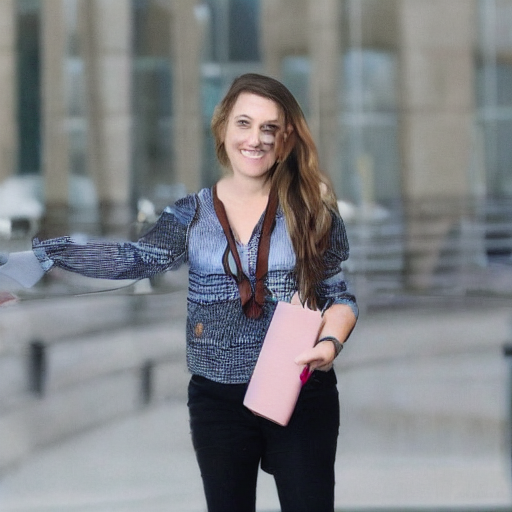

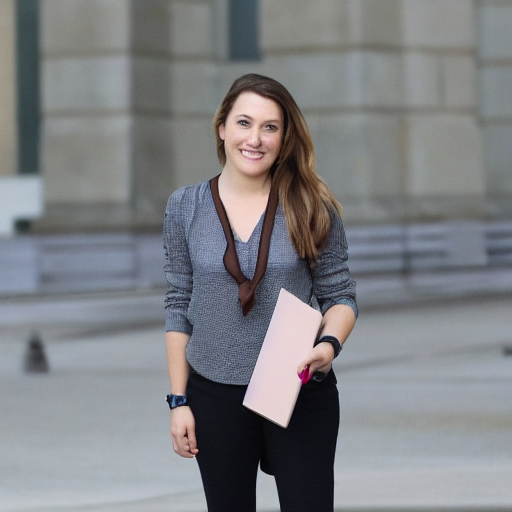

In [ ]:
img_ori = cv2.imread('ori.png')
img_sag = cv2.imread('sag.png')
cv2_imshow(img_ori)
cv2_imshow(img_sag)

In [ ]:
#Trying another example 
seed = 9000
# without SAG
set_seed(seed)
images = pipe(prompt, num_images_per_prompt=1, guidance_scale=guidance_scale, sag_scale=0.0).images
images[0].save(f'ori.png')

# with SAG
set_seed(seed)
images = pipe(prompt, num_images_per_prompt=1, guidance_scale=guidance_scale, sag_scale=sag_scale).images
images[0].save(f'sag.png')

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

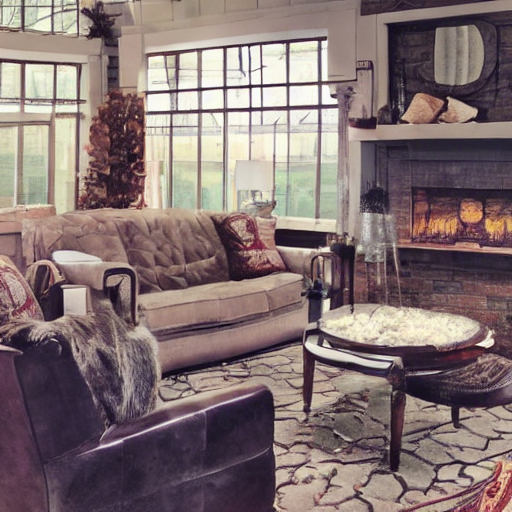

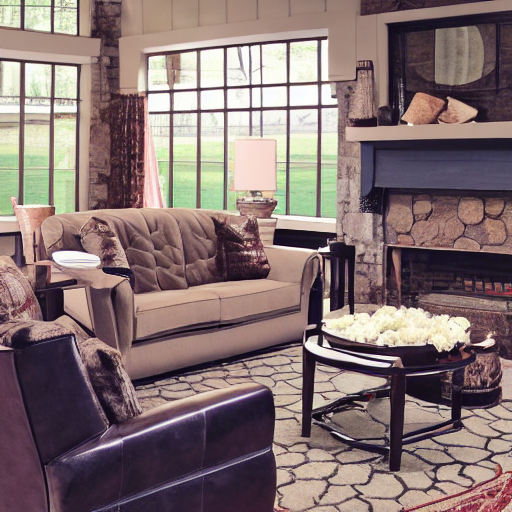

In [ ]:
img_ori = cv2.imread('ori.png')
img_sag = cv2.imread('sag.png')
cv2_imshow(img_ori)
cv2_imshow(img_sag)

# **Fine Tune Stable Diffusion**

In [ ]:
!git clone https://github.com/justinpinkney/stable-diffusion.git
%cd stable-diffusion
!pip install --upgrade pip
!pip install -r requirements.txt

!pip install --upgrade keras # on lambda stack we need to upgrade keras
!pip uninstall -y torchtext # on colab we need to remove torchtext

Cloning into 'stable-diffusion'...
remote: Enumerating objects: 1747, done.
remote: Total 1747 (delta 0), reused 0 (delta 0), pack-reused 1747
Receiving objects: 100% (1747/1747), 73.93 MiB | 38.64 MiB/s, done.
Resolving deltas: 100% (1079/1079), done.
/content/stable-diffusion
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
Obtaining taming-transformers from git+https://github.com/CompVis/taming-transformers.git@master#egg=taming-transformers (from -r requirements.txt (line 23))
  Cloning https://github.com/CompVis/taming-transformers.git (to revision master) to ./src/taming-transformers
  Running command git clone --filter=blob:none --quiet https://github.com/CompVis/taming-transformers.git /content/stable-diffusion/src/taming-transformers
  Resolved https://github.com/CompVis/taming-transformers.

Downloading:   0%|          | 0.00/731 [00:00<?, ?B/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/lambdalabs___parquet/lambdalabs--pokemon-blip-captions-10e3527a764857bd/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.
sample: {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x1280 at 0x7F8B445728B0>, 'text': 'a drawing of a green pokemon with red eyes'}


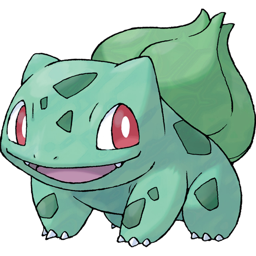

a drawing of a green pokemon with red eyes


In [ ]:
# Check the dataset
from datasets import load_dataset
ds = load_dataset("lambdalabs/pokemon-blip-captions", split="train")
sample = ds[0]
print('sample:',sample) #sample: {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x1280 at 0x7F8B445728B0>, 'text': 'a drawing of a green pokemon with red eyes'}
display(sample["image"].resize((256, 256)))
print(sample["text"])

In [ ]:
!pip install huggingface_hub
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from huggingface_hub import hf_hub_download
ckpt_path = hf_hub_download(repo_id="CompVis/stable-diffusion-v-1-4-original", filename="sd-v1-4-full-ema.ckpt", use_auth_token=True)


In [ ]:
#total batch size = batch size * n gpus * accumulate batches

BATCH_SIZE = 2
N_GPUS = 1
ACCUMULATE_BATCHES = 1

# gpu_list = ",".join((str(x) for x in range(N_GPUS))) + ","
gpu_list="0"
print(f"Using GPUs: {gpu_list}")

Using GPUs: 0


In [ ]:
# Run training
!(python main.py \
    -t \
    --base configs/stable-diffusion/pokemon.yaml \
    --gpus "$gpu_list" \
    --scale_lr False \
    --num_nodes 1 \
    --check_val_every_n_epoch 10 \
    --finetune_from "$ckpt_path" \
    data.params.batch_size="$BATCH_SIZE" \
    lightning.trainer.accumulate_grad_batches="$ACCUMULATE_BATCHES" \
    data.params.validation.params.n_gpus="$NUM_GPUS" \
)

Global seed set to 23
Running on GPUs 0
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.14.mlp.fc2.bias', 'vision_model.encoder.layers.19.layer_norm1.weight', 'vision_model.encoder.layers.9.layer_norm2.weight', 'vision_model.encoder.layers.4.self_attn.out_proj.bias', 'vision_model.encoder.layers.6.self_attn.out_proj.bias', 'vision_model.encoder.layers.5.mlp.fc1.bias', 'vision_model.encoder.layers.11.self_attn.q_proj.weight', 'vision_model.encoder.layers.6.self_attn.out_proj.weight', 'vision_model.encoder.layers.12.self_attn.q_proj.bias', 'vision_model.encoder.layers.19.layer_norm1.bias', 'vision_model.encoder.layers.

# **Stable Diffusion fine-tuned for Fashion Product Images Dataset**

In [ ]:
!pip install diffusers transformers accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 852.0/852.0 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.5 MB/s eta 0:00:00


In [ ]:
from diffusers import StableDiffusionPipeline
import torch

pipeline = StableDiffusionPipeline.from_pretrained("MohamedRashad/diffusion_fashion", torch_dtype=torch.float16)
pipeline.to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.15.1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
prompt = "A photo of a dress, made in 2019, color is Red, Casual usage, Women's cloth, something for the summer season, on white background"
images = pipeline(prompt).images[0]
images.save("red_dress.png")

In [ ]:
prompt = "A photo of a modern dress, color is black and white strip, Casual usage, men's cloth, on white background"
images = pipeline(prompt).images[0]
images.save("black-and-white-strip.png")

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
prompt = "A women's party wear,casual outfit, white background"
images = pipeline(prompt).images[0]
images.save("women-party-wear.png")

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
prompt = "An indian men's traditional outfit"
images = pipeline(prompt).images[0]
images.save("indian-men-traditional.png")

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
prompt = "A women's traditional saree,indian outfit"
images = pipeline(prompt).images[0]
images.save("women-traditional-saree.png")

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
prompt = "A women's sport wear"
images = pipeline(prompt).images[0]
images.save("women-sport-wear.png")

  0%|          | 0/50 [00:00<?, ?it/s]

# **DeepFloyd IF by DeepFloyd, StabilityAI**

In [1]:
!grep MemTotal /proc/meminfo

MemTotal:       13297184 kB


In [2]:
!nvidia-smi

Tue May  2 06:04:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
! pip install --upgrade \
  diffusers~=0.16 \
  transformers~=4.28 \
  safetensors~=0.3 \
  sentencepiece~=0.1 \
  accelerate~=0.18 \
  bitsandbytes~=0.38 \
  torch~=2.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 107.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.1 MB/s eta 0:00:00


In [4]:
!pip install huggingface_hub --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from huggingface_hub import login

login()

## 1. Text-to-image generation
We will walk step by step through text-to-image generation with IF using Diffusers. We will explain briefly APIs and optimizations, but more in-depth explanations can be found in the official documentation for Diffusers, Transformers, Accelerate, and bitsandbytes.



## 1.1 Load text encoder
We will load T5 using 8bit quantization. Transformers directly supports bitsandbytes through the load_in_8bit flag.

The flag variant="8bit" will download pre-quantized weights.

We also use the device_map flag to allow transformers to offload model layers to the CPU or disk. Transformers big modeling supports arbitrary device maps which can be used to separately load model parameters directly to available devices. Passing "auto" will automatically create a device map. See the transformers docs for more information.

In [7]:
from transformers import T5EncoderModel

text_encoder = T5EncoderModel.from_pretrained(
    "DeepFloyd/IF-I-XL-v1.0",
    subfolder="text_encoder", 
    device_map="auto", 
    load_in_8bit=True, 
    variant="8bit"
)

Overriding torch_dtype=None with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in mixed int8. Either pass torch_dtype=torch.float16 or don't pass this argument at all to remove this warning.



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('http'), PosixPath('//172.28.0.1'), PosixPath('8013')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('--logtostderr --listen_host=172.28.0.12 --

## 1.2 Create text embeddings
The Diffusers API for accessing diffusion models is the DiffusionPipeline class and its subclasses. Each instance of DiffusionPipeline is a fully self contained set of methods and models for running diffusion networks. We can override the models it uses by passing alternative instances as keyword arguments to from_pretrained.

In this case, we pass None for the unet argument so no UNet will be loaded. This allows us to run the text embedding portion of the diffusion process without loading the UNet into memory.

In [9]:
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained(
    "DeepFloyd/IF-I-XL-v1.0", 
    text_encoder=text_encoder, # pass the previously instantiated 8bit text encoder
    unet=None, 
    device_map="auto"
)

Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

IF also comes with a super resolution pipeline. We will save the prompt embeddings so that we can later directly pass them to the super resolution pipeline. This will allow the super resolution pipeline to be loaded without a text encoder.

Instead of an astronaut just riding a horse, let's hand him a sign as well!

Let's define a fitting prompt:

In [10]:
prompt = 'a photograph of an astronaut riding a horse holding a sign that says "Pixel\'s in space"'

In [11]:
#run it through the 8bit quantized T5 model:
prompt_embeds, negative_embeds = pipe.encode_prompt(prompt)

## 1.3 Free memory
Once the prompt embeddings have been created. We do not need the text encoder anymore. However, it is still in memory on the GPU. We need to remove it so that we can load the UNet.

It's non-trivial to free PyTorch memory. We must garbage collect the Python objects which point to the actual memory allocated on the GPU.

First, use the python keyword del to delete all python objects referencing allocated GPU memory

In [15]:
del text_encoder
del pipe

The deletion of the python object is not enough to free the GPU memory. Garbage collection is when the actual GPU memory is freed.

Additionally, we will call torch.cuda.empty_cache(). This method isn't strictly necessary as the cached cuda memory will be immediately available for further allocations. Emptying the cache allows us to verify in the colab UI that the memory is available.

We'll use a helper function flush() to flush memory.

In [16]:
import gc
import torch

def flush():
  gc.collect()
  torch.cuda.empty_cache()

In [17]:
#run it
flush()

# 1.4 Stage 1: The main diffusion process
With our now available GPU memory, we can re-load the DiffusionPipeline with only the UNet to run the main diffusion process.

The variant and torch_dtype flags are used by Diffusers to download and load the weights in 16 bit floating point format.

In [18]:
pipe = DiffusionPipeline.from_pretrained(
    "DeepFloyd/IF-I-XL-v1.0", 
    text_encoder=None, 
    variant="fp16", 
    torch_dtype=torch.float16, 
    device_map="auto"
)


A mixture of fp16 and non-fp16 filenames will be loaded.
Loaded fp16 filenames:
[text_encoder/model.fp16-00002-of-00002.safetensors, safety_checker/model.fp16.safetensors, unet/diffusion_pytorch_model.fp16.safetensors, text_encoder/model.fp16-00001-of-00002.safetensors]
Loaded non-fp16 filenames:
[watermarker/diffusion_pytorch_model.safetensors
If this behavior is not expected, please check your folder structure.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:1039 in            │
│ from_pretrained                                                                                  │
│                                                                                                  │
│   1036 │   │   │   │   loaded_sub_model = passed_class_obj[name]                                 │
│   1037 │   │   │   else:                                                                         │
│   1038 │   │   │   │   # load sub model                                                          │
│ ❱ 1039 │   │   │   │   loaded_sub_model = load_sub_model(                                        │
│   1040 │   │   │   │   │   library_name=library_name,                                            │
│   1041 │   │   │   │   │   class_name=class_name,                                                │
│   1042 │   │   │   │   │   importable_classes=importable_classes,                                │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:445 in             │
│ load_sub_model                                                                                   │
│                                                                                                  │
│    442 │                                                                                         │
│    443 │   # check if the module is in a subdirectory                                            │
│    444 │   if os.path.isdir(os.path.join(cached_folder, name)):                                  │
│ ❱  445 │   │   loaded_sub_model = load_method(os.path.join(cached_folder, name), **loading_kwar  │
│    446 │   else:                                                                                 │
│    447 │   │   # else load from the root directory                                               │
│    448 │   │   loaded_sub_model = load_method(cached_folder, **loading_kwargs)                   │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/diffusers/models/modeling_utils.py:610 in                │
│ from_pretrained                                                                                  │
│                                                                                                  │
│   607 │   │   │   │   else:  # else let accelerate handle loading and dispatching.               │
│   608 │   │   │   │   │   # Load weights and dispatch according to the device_map                │
│   609 │   │   │   │   │   # by default the device_map is None and the weights are loaded on th   │
│ ❱ 610 │   │   │   │   │   accelerate.load_checkpoint_and_dispatch(model, model_file, device_ma   │
│   611 │   │   │   │                                                                              │
│   612 │   │   │   │   loading_info = {                                                           │
│   613 │   │   │   │   │   "missing_keys": [],                                                    │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/accelerate/big_modeling.py:479 in                        │
│ load_checkpoint_and_dispatch                                                                     │
│                                                                                                  │
│   476 │   │   )                                            